In [1]:
import numpy as np
from wind_load import Wind_load
from params import Params
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
params = Params()

# Nomenclature

$V_{ref}$: the reference wind speed averaged over 10mins at hub height; (determined in code by wind turbine class)

$V_{ave}$: annual average wind speed at hub height; (by code $V_{ave} = 0.2 \times V_{ref}$)

$V_{e50}$: the steady wind extreme wind model, The **extreme wind speed** $V_{e50}$, with a recurrence period of 50 years, as a function of height


$V_{hub}$: wind speed at hub height;

### illustration of the `Normal wind model`


#### the normal wind profile model of height

The wind profile $V(z)$ denotes the average wind speed as a function of heigh, $z$, as given by:

$$
V(z) = V_{hub} (\frac{z}{z_{hub}})^{0.2}
$$

In [ ]:
z_hub = 80

In [ ]:
z = np.arange(0, z_hub+1, 1)

In [ ]:
# *TODO: the equation to determine V_hub
V_hub = 30

In [ ]:
V_z = V_hub * (z / z_hub)**0.2

In [ ]:
V_z

#### the CDF of wind speed distribution

we first try with the Rayleigh distribution whose CDF is given as:

$$
P(V_{0}) = 1 - e^{[ - \pi (V_{0}/2 V_{ave})^2 ]}
$$

In [ ]:
v0 = np.linspace(0, 50, 1000)

In [ ]:
# the V_{ave} parameter
V_ave = 8.9

In [ ]:
cdf = 1 - np.exp(- np.pi * (v0 / (2 * V_ave))**2)

In [ ]:
fig, ax = plt.subplots()
ax.plot(v0, cdf)
ax.set_title('Rayleigh distribution for wind speed')
ax.set_xlabel('wind velocity')
ax.set_ylabel('CDF')

In [ ]:
cdf.shape

#### sampling

In [ ]:
u = np.random.uniform(low=0, high=1, size=10000)

In [ ]:
# u is the Uniform random variable
# write down the quantifle function (inverse of cdf)
samples = np.sqrt(- (4 * V_ave**2 / np.pi ) * np.log(1 - u))

In [ ]:
samples.shape

In [ ]:
fig, ax = plt.subplots()
ax.hist(samples)

### Illustration of the `Normal turbulence model`

$$
\sigma_{1} = I_{ref} (0.75 V_{hub} + 5.6)
$$

In [ ]:
# for class 2A
Iref = 0.16

In [ ]:
# example plot
Vhub = np.linspace(0, 30, 100)
sigma1 = Iref * (0.75 * Vhub + 5.6)

In [ ]:
fig, ax = plt.subplots()
ax.plot(Vhub, sigma1)
ax.set_xlabel(r'$V_{hub}$')
ax.set_ylabel(r'$\sigma_{1}$')
ax.set_title('Turbulence standard deviation for the normal turbulence model')

### Illustration of the `Extrme wind speed model`

The Extrme wind speed model shall be either a steady or a turbulent wind model (with the difference of a scaling factor 1.4).
The wind models shall be based on the reference wind speed $V_ref$ and a fixed turbulence standard deviation $\sigma_{1}$. For the steady wind extreme wind model, The **extreme wind speed** $V_{e50}$, with a recurrence period of 50 years, as a function of height $z$, is given by:

$$
V_{e50}(z) = 1.4 V_{ref} (\frac{z}{z_{hub}})^{0.11}
$$

In [8]:
V_ref = params.V_ref

In [9]:
z = params.z 

In [10]:
z_hub = params.z_hub

In [11]:
V_e50_z = 1.4 * V_ref * (z / z_hub)**0.11

In [12]:
V_e50_z

array([55.22029016, 59.59529637, 62.31348237, 64.3169266 , 65.91517126,
       66.39239567, 66.84338229, 67.27101717, 67.67772755, 68.06557487,
       68.43632537, 68.79150428, 69.13243812, 69.46028803, 69.77607638])

Text(0.5, 0, 'height (m)')

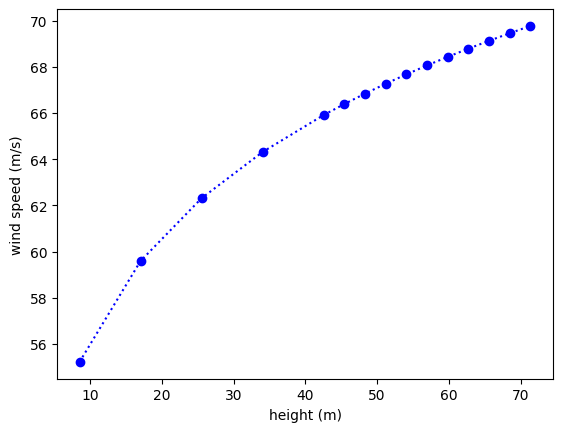

In [18]:
fig, ax = plt.subplots()
ax.plot(z, V_e50_z, 'b:o')
ax.set_ylabel('wind speed (m/s)')
ax.set_xlabel('height (m)')

### Illustration of the `Extrme turbulence model`

The extreme turbulence model shall use **the normal wind profile model** and turbulence with longitudinal component std given by:

$$
\sigma_{1} = c \times I_{ref} \Bigg[ 0.072(\frac{V_{ave}}{c} + 3) (\frac{V_{hub}}{c} - 4) + 10  \Bigg]
$$

where $c=2$

In [ ]:
c=2

In [ ]:
sigma_1_extreme = 2 * Iref * (0.072 * (V_ave/c + 3) * (V_hub/c -4) + 10)

In [ ]:
sigma_1_extreme

### Illustration of the parametrisation of $V_{hub}$

$$
V_{10} = V_{hh} \times \frac{\ln(10/0.05)}{\ln ({hh/0.05})}   
$$


# questions

- [ ] how to determine $V_{hub}$

# other stuff


tips:

We have 11 nodes with wind speed calculated, therefore, we need 12 area and height for computing delta height

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [ ]:
# plus 1 at the end

area_com = np.array([0.496861728, 0.295312851, 0.282306657, 0.269300464, 0.25629427, 0.243288077, 0.229559317, 0.216553123, 0.20354693, 0.190540736, 0.177534542, 0.177534542])

In [ ]:
area_com.shape

In [ ]:
area_ave = moving_average(area_com, 2)

In [ ]:
area_ave

In [ ]:
area_ave.shape

In [ ]:
# plus one height of the hub and one zero at the front.

heighs_com = np.array([0, 42.55, 45.434, 48.318, 51.202, 54.086, 56.97, 59.854, 62.738, 65.622, 68.506, 71.39, 75.3])

In [ ]:
heighs_com.shape

In [ ]:
middle_h = moving_average(heighs_com, 2)

In [ ]:
middle_h.shape

In [ ]:
middle_h

In [ ]:
delta_h = np.diff(middle_h)

In [ ]:
delta_h.shape

In [ ]:
delta_h

In [ ]:
aaa = np.array([1,2,3])
b = np.insert(arr=aaa, obj=0, values=9.0)

In [ ]:
b